In [1]:
%cd drive/MyDrive/thesis
%ls

/content/drive/MyDrive/thesis
cc.zh.300.bin                            wen_yue_sent_alignment.csv
cmn_wen_sent_alignment.csv               wen_yue_subs.csv
cmn_wen_subs.csv                         wuu_wen_bigram.csv
cmn_wuu_sent_alignment.csv               wuu_wen_sent_alignment.csv
cmn_wuu_subs.csv                         wuu_wen_subs.csv
cmn_yue_sent_alignment.csv               wuu_wen_trigram.csv
cmn_yue_subs.csv                         wuu_wen_unigram.csv
cmn-yue-wuu-wen-parallel-simplified.csv  wuu_yue_sent_alignment.csv
sgns.merge.char                          wuu_yue_subs.csv
wen_wuu_sent_alignment.csv


In [31]:
import pandas as pd
import numpy as np
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from statistics import stdev, mean, median
from scipy.stats import norm as norm_d
import seaborn as sns
np.seterr(divide='warn', invalid='warn')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Key points: 
gap_penalty,
cosine_similarity when one of the vectors is 0,
cosine similarity function that return value from 0 to 1 (no negative values)
normalize so the density add up to 1
...


In [3]:
# the function definitions are from https://medium.com/@nandiniumbarkar/needleman-wunsch-algorithm-7bba68b510db
# the normalized by the length of the aligned sentence, maximum value is the match_score*length/length
#and minimum score is the (gap_penalty*gap_num + mismatch_score*mismatch_num)/length
def print_matrix(mat):
  # Loop over all rows
  for i in range(0, len(mat)):
    print("[", end = "")
    # Loop over each column in row i
    for j in range(0, len(mat[i])):
      # Print out the value in row i, column j
      print(mat[i][j], end = "")
      # Only add a tab if we're not in the last column
      if j != len(mat[i]) - 1:
        print("\t", end = "")
    print("]\n")
def match_score(alpha, beta, gap_penalty):
  if alpha == beta:
    return match_award
  elif alpha == '-' or beta == '-':
    return gap_penalty
  else:
    return mismatch_penalty
def needleman_wunsch(seq1, seq2, gap_penalty=-1):
  # Store length of two sequences
  n = len(seq1)
  m = len(seq2)
  t1 = m+1
  t2 = n+1
  # Generate matrix of zeros to store scores
  score = np.zeros((t1, t2))
  # Calculate score table
  # Fill out first column
  for i in range(0, m + 1):
    score[i][0] = gap_penalty * i
    # Fill out first row
  for j in range(0, n + 1):
    score[0][j] = gap_penalty * j
  # Fill out all other values in the score matrix
  for i in range(1, m + 1):
    for j in range(1, n + 1):
      # Calculate the score by checking the top, left, and diagonal cells
      matchh = score[i - 1][j - 1] + match_score(seq1[j-1], seq2[i-1], gap_penalty)
      mismatch_up = score[i - 1][j] + gap_penalty
      mismatch_left = score[i][j - 1] + gap_penalty
      # Record the maximum score from the three possible scores calculated above
      score[i][j] = max(matchh, mismatch_up, mismatch_left)
  #print_matrix(score)
  # Traceback and compute the alignment
  # Create variables to store alignment
  align1 = ""
  align2 = ""
  # Start from the bottom right cell in matrix
  i = m
  j = n
  # We'll use i and j to keep track of where we are in the matrix, just like above
  while i > 0 and j > 0: # end touching the top or the left edge
    score_current = score[i][j]
    score_diagonal = score[i-1][j-1]
    score_up = score[i][j-1]
    score_left = score[i-1][j]
    # Check to figure out which cell the current score was calculated from,
    # then update i and j to correspond to that cell.
    if score_current == score_diagonal + match_score(seq1[j-1], seq2[i-1], gap_penalty):
      align1 += seq1[j-1]
      align2 += seq2[i-1]
      i -= 1
      j -= 1
    elif score_current == score_up + gap_penalty:
      align1 += seq1[j-1]
      align2 += '-'
      j -= 1
    elif score_current == score_left + gap_penalty:
      align1 += '-'
      align2 += seq2[i-1]
      i -= 1
  # Finish tracing up to the top left cell
  while j > 0:
    align1 += seq1[j-1]
    align2 += '-'
    j -= 1
  while i > 0:
    align1 += '-'
    align2 += seq2[i-1]
    i -= 1
  # Since we traversed the score matrix from the bottom right, our two sequences will be reversed.
  # These two lines reverse the order of the characters in each sequence.
  align1 = align1[::-1]
  align2 = align2[::-1]
  return {"alignment":(align1, align2), "score": score[-1, -1]/len(align1)}
#gap_penalty = -1 (set in the function)
match_award = 1
mismatch_penalty = -1
# Make a score matrix with these two sequences
seq1 = "哏末哪能呢"
seq2 = "那就訾那能爻"
#seq1 = "再见杰克"
#seq2 = "再见杰克"
result = needleman_wunsch(seq1, seq2)
print(result["alignment"][0] + "\n" + result["alignment"][1])
print("score: \n", result["score"])

-哏末哪能呢
那就訾那能爻
score: 
 -0.6666666666666666


In [4]:
data = pd.read_csv("cmn-yue-wuu-wen-parallel-simplified.csv", encoding="utf-8")
data

,Unnamed: 0,Unnamed: 0.1,cmn_id,cmn_sentence,wuu_sentence,wen_sentence,yue_id,yue_sentence
0,0,0,1,我们试试看！,阿拉试试！,卬你试试眙！,736566,我哋试吓吖！
1,1,1,51,那又怎样?,哏末哪能呢？,那就訾那能爻？,613421,嗯，咁呢？
2,2,2,339240,不要说废话！,侬勿要瞎讲！,覅讲废话！,405462,唔好喺度乱噏廿四！
3,3,3,340093,这个苹果很酸。,搿只苹果老酸个。,居个苹果酸显酸。,493501,呢粒苹果好酸。
4,4,4,342196,别忘了明天六时来接我。,勿要忘记脱明朝6点钟来寻我。,覅悗记爻明朝六点钟走来接我。,487447,唔好唔记得听日六点嚟搵我喎。
...,...,...,...,...,...,...,...,...
135,135,135,5500559,你们比我还高。,侬比我高。,你厘比我还高哩。,477683,你高过我。
136,136,136,6559017,你好吗？,侬好伐？,你好啊伐？,480820,你点呀？
137,137,137,10329955,你们怎么就是没相信我呢？,侬为啥勿相信我？,你厘訾那就冇相信我呢？,481503,你点解唔信我呀？
138,138,138,10631557,他父母对他怀有过高的期望。,伊拉爷娘对伊期望过高。,渠个爸妈对渠期望忒高。,488277,佢阿爸阿妈对佢期望过高。


#### distance score with random set gap penalty and matching score <br>
For match score 1 and mismatch and penalty score -1, the normalized sentence distance score is from -1 to 1 (1 means total matching sentences, -1 total mismatch sentences)

In [5]:
cmn = data["cmn_sentence"]
wuu = data["wuu_sentence"]
for i, s in enumerate(cmn):
  result = needleman_wunsch(cmn[i], wuu[i])
  print("Sentence Alignment: ", i)
  print(result["alignment"][0] + "\n" + result["alignment"][1])
  print("score:", result["score"], "\n")


Sentence Alignment:  0
我们试试看！
阿拉试试-！
score: 0.0 

Sentence Alignment:  1
-那又怎样?
哏末哪能呢？
score: -1.0 

Sentence Alignment:  2
-不要说废话！
侬勿要-瞎讲！
score: -0.42857142857142855 

Sentence Alignment:  3
这个苹果很酸-。
搿只苹果老酸个。
score: 0.0 

Sentence Alignment:  4
-别忘-了明-天六时来接我。
勿要忘记脱明朝6点钟来寻我。
score: -0.2857142857142857 

Sentence Alignment:  5
我相信他是个聪明人。
我相信伊是个聪明人。
score: 0.8 

Sentence Alignment:  6
什么时候出发最方便你？
-啥辰光出发最方便侬？
score: 0.09090909090909091 

Sentence Alignment:  7
我永远不会-忘记-你。
我永远勿会得忘记脱侬。
score: 0.2727272727272727 

Sentence Alignment:  8
我打算把这块手表送给你。
我打算拿搿只手錶送拨侬。
score: 0.0 

Sentence Alignment:  9
这些书是--谁的？
-搿眼是啥人个书？
score: -0.5555555555555556 

Sentence Alignment:  10
这条规则不是什么时候都适用的。
搿条规则勿是啥个辰光侪适用个。
score: -0.06666666666666667 

Sentence Alignment:  11
天气每-天-都在变。
天气每日天侪垃海变。
score: 0.2 

Sentence Alignment:  12
你应该先和你的父母谈谈。
侬应该跟㑚爷娘谈清爽先。
score: -0.5 

Sentence Alignment:  13
-参加的人并不多。
呒没多少人-垃海。
score: -0.5555555555555556 

Sentence Alignment:  14
我们的结论就是，那个传言是真的。
阿拉个结论就是，诶额传言是真个。
score: 0.25

#### Use similarity scores as weights for alignment

##### another pretrained Madarin vectors to use

In [6]:
#!bunzip2 sgns.merge.char.bz2
#with open("sgns.merge.char", "r", encoding="utf-8") as f:

##### Use fastText

In [7]:
!pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4402125 sha256=6474f9b95947f9136507f0309ccc4ca86dee8300d6f1f44b6b5f3131ca9d757a
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fastText


In [8]:
import fasttext
import fasttext.util

In [9]:
ft = fasttext.load_model('cc.zh.300.bin')

In [10]:
ft.get_word_vector("我").shape

(300,)

In [11]:
word_1 = ft.get_word_vector("吗")
word_2 = ft.get_word_vector("伐")
np.dot(word_1,word_2)/(norm(word_1)*norm(word_2))

0.12787522

In [12]:
## notice that for the unkown character to the model it returns vector with all 0
# which trigers divide by 0 error when computing cosine similarity
print(ft.get_word_vector("𠲎"))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Before getting Needleman-Wunsch score, have an overview of the cosine similairy of the language pairs.

**cmn_wen:** 
- Mean: 0.2508027
- All unknown characters: {'狃', '剫', '埏', '悗', '眙'} 

**cmn_wuu:** 
- Mean: 0.2525895
- All unkown characters: {'砬', '墶', '搿', '隑', '哴', '龌', '㑚', '龊'}

**cmn_yue:**
- Mean: 0.23636292
- All unkown characters: {'躝', '掹', '𢱕', '埲'}

**wuu_wen:**
- Mean: 0.23638898
- All unkown characters: {'砬', '墶', '搿', '隑', '哴', '狃', '剫', '埏', '龌', '悗', '眙', '㑚', '龊'}

**wuu_yue:**
- Mean: 0.22360104
- All unkown characters: {'掹', '砬', '墶', '搿', '埲', '隑', '哴', '躝', '龌', '𢱕', '㑚', '龊'}

**wen_yue:**
- Mean: 0.22270949
- All unkown characters: {'掹', '埲', '狃', '剫', '埏', '躝', '悗', '眙', '𢱕'}

In [14]:
def get_all_char_similarities(lang1_name, lang2_name):
  lang1 = data[lang1_name+"_sentence"]
  lang2 = data[lang2_name+"_sentence"]
  punc = ["。", "，", "！", "？", "'", "\"", ",", ".", "、", "?", "「", "」"]
  num = "0123456789"
  known = {}
  unknown = set()
  for i in range(len(lang1)):
    # remove the punc in the sentences
    sent_1 = "".join([c.strip() for c in lang1[i] if c not in punc and c not in num])
    sent_2 = "".join([c.strip() for c in lang2[i] if c not in punc and c not in num])
    for n in range(len(sent_1)):
      alpha = sent_1[n]
      alpha_vec = ft.get_word_vector(alpha)
      if norm(alpha_vec) == 0.0:
        unknown.add(alpha)
      else: 
        for m in range(len(sent_2)):
          beta = sent_2[m]
          beta_vec = ft.get_word_vector(beta)
          if norm(beta_vec) == 0.0:
            unknown.add(beta)
          else:
            if (alpha, beta) not in known:
              known[(alpha, beta)] = 0
            known[(alpha, beta)] = np.dot(alpha_vec,beta_vec)/(norm(alpha_vec)*norm(beta_vec))
  return known, unknown

In [15]:
k, unk = get_all_char_similarities("wen", "yue")
l = list(k.values())
print("Mean:", mean(l)), print("All unkown characters:", unk)

Mean: 0.22270949
All unkown characters: {'躝', '眙', '悗', '𢱕', '埏', '狃', '剫', '掹', '埲'}


(None, None)

[]

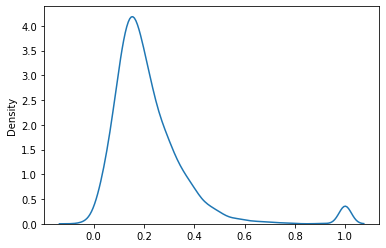

In [16]:
ax = sns.kdeplot(l, common_norm=True) 
ax.plot()

Rewrite the match score using cosine similarity of characters.

The match_score will be between -1 and 1. Set gap_penalty to 0 so only the match/mismatch are affecting final alignment similarity score. (will align along the highest match_score in the sentences (same substrings). For vector of 0 (unknown character for the fasttext model), the similarity is applying the lowest mean of the cosine similarity scores of all characters of each language pair.)

In [17]:
#mean_cs_score = {("cmn", "wuu"):0.25,("cmn", "wen"):0.25, ("cmn", "yue"):0.23, ("wuu", "wen"):0.23,
                 #("wuu", "yue"):0.22, ("wen", "yue"):0.22}
def match_score(alpha, beta, gap_penalty):
  if alpha == '-' or beta == '-':
    return gap_penalty
  else:
    alpha_vec = ft.get_word_vector(alpha)
    beta_vec = ft.get_word_vector(beta)
    similarity = 0
    if norm(alpha_vec) != 0.0 and norm(beta_vec) != 0.0:
      cosine = np.dot(alpha_vec,beta_vec)/(norm(alpha_vec)*norm(beta_vec))
      #similarity = (cosine-min)/(max-min)
      similarity = cosine
    # for characters that do not exist in the model how to set the similarity???
    # use the lowest mean
    else:
      similarity = 0.22
    #print(alpha, beta, similarity)
    return similarity

def get_alignment(lang1_name, lang2_name, gap_penalty=0):
  lang1 = data[lang1_name+"_sentence"]
  lang2 = data[lang2_name+"_sentence"]
  punc = ["。", "，", "！", "？", "'", "\"", ",", ".", "、", "?", "「", "」"]
  num = "0123456789"
  aligned = []
  scores = []
  for i in range(len(lang1)):
    # remove the punc in the sentences
    sent_1 = "".join([c.strip() for c in lang1[i] if c not in punc and c not in num])
    sent_2 = "".join([c.strip() for c in lang2[i] if c not in punc and c not in num])
    result = needleman_wunsch(sent_1, sent_2, gap_penalty)
    aligned.append(result["alignment"])
    scores.append(result["score"])
  return aligned, scores

Average sentence similarity score (but maybe using sampling instead of averaging): 
- cmn-wen: 0.5991272963376684, 
- cmn-wuu: 0.6066810124908303,
- cmn-yue: 0.5006626045418683,
- wuu-wen: 0.5266724797711066,
- wuu-yue: 0.42970293365845735,
- wen-yue: 0.4441018471719493

In [18]:
## get the aligned_sentences for each language pair and their alignment score
def output(lang1_name, lang2_name, save=True):
  aligned_sents, aligned_scores = get_alignment(lang1_name, lang2_name)
  df = []
  for i in range(len(aligned_sents)): 
    df.append((aligned_sents[i][0], aligned_sents[i][1], aligned_scores[i]))
    print("Sentence Alignment: ", i)
    print(aligned_sents[i][0] + "\n" + aligned_sents[i][1])
    print("score:", aligned_scores[i], "\n")
  if save:
    df = pd.DataFrame(data=df, columns=[lang1_name, lang2_name, "norm.similairity score"])
    df.to_csv(lang1_name+"_"+lang2_name+"_sent_alignment.csv", encoding="utf-8")
  print("average score:", sum(aligned_scores)/len(aligned_scores))

In [19]:
output("cmn", "wen")

Sentence Alignment:  0
-我们试试看
卬你-试试眙
score: 0.4979888947804769 

Sentence Alignment:  1
那又-怎样-
那就訾那能爻
score: 0.40784837305545807 

Sentence Alignment:  2
不要说废话
覅-讲废话
score: 0.5732859671115875 

Sentence Alignment:  3
这个苹果-很酸
居个苹果酸显酸
score: 0.6321752795151302 

Sentence Alignment:  4
别-忘了明天六时--来接我
覅悗记爻明朝六点钟走来接我
score: 0.5041571706533432 

Sentence Alignment:  5
我相信他是个聪明人
我相信渠是个聪明人
score: 0.9007055958112081 

Sentence Alignment:  6
什么时候出发最方便-你
-若能届走-最方便啊你
score: 0.47909180413592944 

Sentence Alignment:  7
我永远不会忘记你
我永远覅-悗记你
score: 0.6770125852525235 

Sentence Alignment:  8
我打算把-这块手表送给你
我打算逮居个-手表送匄你
score: 0.6795957970122496 

Sentence Alignment:  9
这些书是--谁的
居厘书是何乜人个
score: 0.39969576336443424 

Sentence Alignment:  10
这条规则不是什么时候都适用的
居条规定否是若能届沃可以用个
score: 0.49437322095036507 

Sentence Alignment:  11
天气每天-都在变
天气每日沃是得变
score: 0.6985728554427624 

Sentence Alignment:  12
你应该先和你的父母谈-谈-
你应该伉-你-爸妈谈一谈先
score: 0.5223928139759944 

Sentence Alignment:  13
参加的人并不多
参加个人并否多
score: 0.845009216240474

In [20]:
# a function to return different n-grams (1-3) of alignments and its count from the aligned sentence pair
def get_ngram_alignment(aligned_sent_pairs, n=1):
  ngram_align = {}
  for pair in aligned_sent_pairs:
    sent_1 = pair[0]
    sent_2 = pair[1]
    #print(sent_1, sent_2)
    i = 0
    #while i < len(sent_1)-n:
    for i in range(len(sent_1)-n + 1):
      ngram_a = sent_1[i:i+n]
      ngram_b = sent_2[i:i+n]
      #if ngram_a != ngram_b:
      ngram_pair = ngram_a, ngram_b
      if ngram_pair not in ngram_align:
        ngram_align[ngram_pair] = 1
      else:
        ngram_align[ngram_pair] += 1
      #i += n
  return ngram_align

In [21]:
# only keep the ngam that appear more than once, and between two n + n and 2n, keep the one with more counts
def min_edit(aligned_sent_pairs, unigrams, bigrams, trigrams): 
  all_aligned = []
  for pair in aligned_sent_pairs:
    sent_1 = pair[0]
    sent_2 = pair[1]
    true_aligned = []
    best = "tri"
    while len(sent_1) > 0:
      if len(sent_1) >= 3:
        tri_pair = sent_1[:3], sent_2[:3]
        bi_01_pair = sent_1[:2], sent_2[:2]
        bi_12_pair = sent_1[1:3], sent_2[1:3]
        uni_0_pair = sent_1[0], sent_2[0]
        bi_01_count = bigrams[bi_01_pair]
        bi_12_count =bigrams[bi_12_pair]
        tri_count = trigrams[tri_pair]
        ## if trigram occurs more than once, take it
        if tri_count > 1:
          best = "tri"
        elif tri_count == 1:
          ## if one is bigger than the other, this one is certainly bigger than 1
          if bi_12_count > 1 and bi_12_count > bi_01_count:
              best = "tri_12"
          elif bi_01_count > 1 and bi_01_count > bi_12_count:
              best = "bi_01"     
          ## bi_01_count == bi_12_count == 1
          else:
            best = "uni_0"
      elif len(sent_1) == 2:
        bi_01_pair = sent_1[:2], sent_2[:2]
        uni_0_pair = sent_1[0], sent_2[0]
        uni_0_count = unigrams[uni_0_pair] 
        bi_01_count = bigrams[bi_01_pair]
        if bi_01_count > 1:
          best = "bi_01"
        else:
          best = "uni_0"
      elif len(sent_1) == 1:
        uni_0_pair = sent_1[0], sent_2[0]
        best = "uni_0"  

      if best == "tri":
        true_aligned.append(tri_pair)
        sent_1 = sent_1[3:]
        sent_2 = sent_2[3:]
      if best == "tri_12":
        true_aligned.append(uni_0_pair)
        true_aligned.append(bi_12_pair)
        sent_1 = sent_1[3:]
        sent_2 = sent_2[3:]
      if best == "bi_01":
        true_aligned.append(bi_01_pair)
        sent_1 = sent_1[2:]
        sent_2 = sent_2[2:]
      if best == "uni_0":
        true_aligned.append(uni_0_pair)
        sent_1 = sent_1[1:]
        sent_2 = sent_2[1:]
      #print("best: ", best)
      #print("steps: ", step)
      #print("rest of sent: ", sent_1, sent_2)

    all_aligned.append(true_aligned)
  return all_aligned

The problem is a lot of right alignments only appear once in the data due to the small size of data ;( <br>
So filter by the count doesn't seem so good anymore.

In [22]:
aligned_sents, aligned_scores = get_alignment("cmn", "wen")

In [23]:
cmn_wen_unigram = get_ngram_alignment(aligned_sents)
cmn_wen_bigram = get_ngram_alignment(aligned_sents, 2)
cmn_wen_trigram = get_ngram_alignment(aligned_sents, 3)
cmn_wen_unigram[('这', '居')],  cmn_wen_unigram[("个", "个")], cmn_wen_bigram[("苹果", "苹果")], cmn_wen_trigram[("这个苹", "居个苹")]

(10, 9, 3, 1)

In [24]:
## get the minimum edit steps
aligned = min_edit(aligned_sents, cmn_wen_unigram, cmn_wen_bigram, cmn_wen_trigram)
cmn_wen_avgReplaces = sum([len(a) for a in aligned])/len(aligned)
cmn_wen_avgReplaces

9.564285714285715

#### Sampling all the sample for 1000 times with replacement

##### plot fucntion

In [25]:
def plot(df, color=None, annotate_mean=True):
  # Calculating mean and standard deviation
  m, sd = 0, 0 
  ax = sns.kdeplot()
  t = 0
  for name in df.columns:
    md = median(df[name])
    mn = mean(df[name])
    sd = stdev(df[name])
    print("Language pair:", name[:3]+",", name[4:8])
    print("mean: ", mn, ";", "median: ", md, "standard derivation: ", sd)
    print("2u: ", md-2*sd, "-", md+2*sd)
    #ax = sns.histplot(df, stat="probability", kde=True, color=color) 
    if annotate_mean:
      ax.axvline(x=md, color="pink")
      t += 1
      ax.annotate(s="median: "+str(md)[:5], xy=(md+0.01,t))
    ax = sns.kdeplot(data=df, color=color, common_norm=True) #bw_adjust=.5) 
    ax.plot()
  

##### Get the distribution of avarage sentene pair Needleman Wunsh scores that uses similairity scores

In [26]:
def get_NW_distribution(lang1_name, lang2_name):
  all_sentAvg_scores = []
  aligned_sents, alignment_scores = get_alignment(lang1_name,lang2_name)
  for i in range(1000):  
    sent_scores = random.choices(alignment_scores, k=len(alignment_scores))
    avg_score = sum(sent_scores)/len(sent_scores)
    all_sentAvg_scores.append(avg_score)
  return all_sentAvg_scores

In [27]:
nw_scores_cwe = get_NW_distribution("cmn", "wen")

In [28]:
nw_scores_cwu = get_NW_distribution("cmn", "wuu")
nw_scores_cy  = get_NW_distribution("cmn", "yue")
nw_scores_ww  = get_NW_distribution("wuu", "wen")
nw_scores_wuy = get_NW_distribution("wuu", "yue")
nw_scores_wey = get_NW_distribution("wen", "yue")

In [29]:
nw_stack = np.stack((np.array(nw_scores_cwe), np.array(nw_scores_cwu), np.array(nw_scores_cy),
                     np.array(nw_scores_ww), np.array(nw_scores_wuy), np.array(nw_scores_wey)), axis=1)
nw_df = pd.DataFrame(data=nw_stack, columns=["cmn_wen", "cmn_wuu", "cmn_yue", "wuu_wen", "wuu_yue", "wen_yue"], dtype=np.float64)
nw_df

,cmn_wen,cmn_wuu,cmn_yue,wuu_wen,wuu_yue,wen_yue
0,0.613525,0.609550,0.478379,0.542383,0.439609,0.427364
1,0.604140,0.614228,0.468652,0.521668,0.418948,0.442905
2,0.614325,0.623633,0.503743,0.530354,0.420023,0.450088
3,0.609932,0.609154,0.533302,0.530361,0.436757,0.428281
4,0.582455,0.605765,0.501650,0.539858,0.407595,0.438128
...,...,...,...,...,...,...
995,0.585520,0.606846,0.503309,0.529329,0.430759,0.456351
996,0.616139,0.632664,0.490916,0.532467,0.431949,0.446035
997,0.583988,0.596919,0.505232,0.497856,0.423888,0.452026
998,0.605284,0.600901,0.500896,0.510005,0.409290,0.452841


Language pair: cmn, wen
mean:  0.5994400273598746 ; median:  0.5993785718555156 standard derivation:  0.012857383536411528
2u:  0.5736638047826925 - 0.6250933389283386
Language pair: cmn, wuu
mean:  0.607129718986876 ; median:  0.6074698057344705 standard derivation:  0.014964866000147622
2u:  0.5775400737341753 - 0.6373995377347658
Language pair: cmn, yue
mean:  0.5004548284416391 ; median:  0.5000294763182713 standard derivation:  0.014416369128254206
2u:  0.47119673806176293 - 0.5288622145747798
Language pair: wuu, wen
mean:  0.5269658512619185 ; median:  0.5273513632680107 standard derivation:  0.01429504245756345
2u:  0.4987612783528838 - 0.5559414481831376
Language pair: wuu, yue
mean:  0.43042375686267853 ; median:  0.4307814350418731 standard derivation:  0.012699790940901826
2u:  0.40538185316006947 - 0.45618101692367674
Language pair: wen, yue
mean:  0.4444060314381385 ; median:  0.44474562186777356 standard derivation:  0.012770918429418366
2u:  0.41920378500893685 - 0.47028

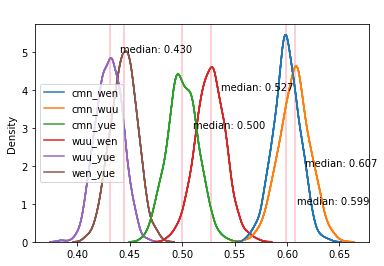

In [32]:
plot(nw_df)

##### Get the distributuion of average sentence replace steps with the generated substitution pairs that transforms one language to another

In [33]:
# first get aligned-by-sentence language pair
def sampling(lang1_name, lang2_name):
  aligned_sents, alignment_scores = get_alignment(lang1_name,lang2_name)
  # sample with replacement of the aligned sentence pairs for 1000 times, each time sample 140 sentence_pairs
  # each run get all the ngram alignments and then get the best phrases alignment with the minimum susbstitution steps 
  # to transfer one language to another
  all_best_aligned = []
  all_min_steps = []
  all_avgSteps = []
  for i in range(1000):
    sent_pairs = random.choices(aligned_sents, k=len(aligned_sents))
    unigrams = get_ngram_alignment(sent_pairs, n=1)
    bigrams = get_ngram_alignment(sent_pairs, n=2)
    trigrams = get_ngram_alignment(sent_pairs, n=3)
    best_aligned = min_edit(sent_pairs, unigrams, bigrams, trigrams)
    all_best_aligned.append(best_aligned)
    all_min_steps += [len(a) for a in best_aligned]
    all_avgSteps.append(sum([len(a) for a in best_aligned])/len(best_aligned))
  return all_avgSteps, all_best_aligned, all_min_steps


In [34]:
cmn_wuu_steps = sampling("cmn", "wen")
cmn_wen_steps = sampling("cmn", "wuu")
cmn_yue_steps = sampling("cmn", "yue")
wuu_wen_steps = sampling("wuu", "wen")
wuu_yue_steps = sampling("wuu", "yue")
wen_yue_steps = sampling("wen", "yue")

In [35]:
cmn_wen_allAvgSteps = cmn_wen_steps[0]
cmn_wuu_allAvgSteps = cmn_wuu_steps[0]
cmn_yue_allAvgSteps = cmn_yue_steps[0]
wuu_wen_allAvgSteps = wuu_wen_steps[0]
wuu_yue_allAvgSteps = wuu_yue_steps[0]
wen_yue_allAvgSteps = wen_yue_steps[0]

In [36]:
# stack the three languages with Madarin
stack = np.stack((np.array(cmn_wen_allAvgSteps), np.array(cmn_wuu_allAvgSteps), np.array(cmn_yue_allAvgSteps),
                  np.array(wuu_wen_allAvgSteps),np.array(wuu_yue_allAvgSteps), np.array(wen_yue_allAvgSteps)), axis=1)
steps_df = pd.DataFrame(data=stack, dtype=np.float64)
steps_df.columns = ["cmn_wen", "cmn_wuu", "cmn_yue", "wuu_wen", "wuu_yue", "wen_yue"]
steps_df.columns

Index(['cmn_wen', 'cmn_wuu', 'cmn_yue', 'wuu_wen', 'wuu_yue', 'wen_yue'], dtype='object')

Plotting

Language pair: wuu, wen
mean:  6.659221428571429 ; median:  6.664285714285715 standard derivation:  0.35061154421171925
2u:  5.9630626258622765 - 7.365508802709153


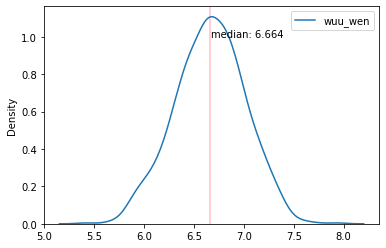

In [37]:
wuu_wen_df = pd.DataFrame(wuu_wen_allAvgSteps, columns=["wuu_wen"])
wuu_yue_df = pd.DataFrame(wuu_yue_allAvgSteps, columns=["wuu_yue"])
wen_yue_df = pd.DataFrame(wen_yue_allAvgSteps, columns=["wen_yue"])
wuu_wen = plot(wuu_wen_df)

Language pair: wuu, yue
mean:  6.756678571428571 ; median:  6.771428571428571 standard derivation:  0.3678647110271499
2u:  6.035699149374271 - 7.507157993482871


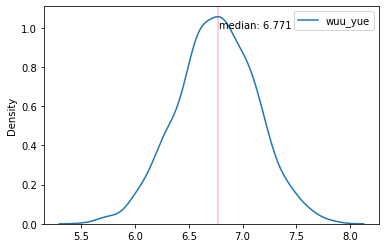

In [40]:
wuu_yue = plot(wuu_yue_df)

Language pair: wen, yue
mean:  6.730585714285715 ; median:  6.742857142857143 standard derivation:  0.35362405491865945
2u:  6.035609033019824 - 7.4501052526944616


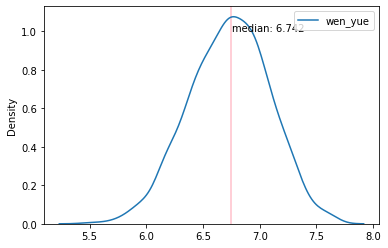

In [39]:
wen_yue = plot(wen_yue_df)

Language pair: cmn, wen
mean:  6.3958571428571425 ; median:  6.4071428571428575 standard derivation:  0.3257005624290057
2u:  5.7557417322848465 - 7.058543982000868
Language pair: cmn, wuu
mean:  6.357642857142857 ; median:  6.357142857142857 standard derivation:  0.319960747564483
2u:  5.717221362013891 - 6.997064352271822
Language pair: cmn, yue
mean:  6.489614285714286 ; median:  6.485714285714286 standard derivation:  0.3286438442572825
2u:  5.828426597199721 - 7.14300197422885
Language pair: wuu, wen
mean:  6.659221428571429 ; median:  6.664285714285715 standard derivation:  0.35061154421171925
2u:  5.9630626258622765 - 7.365508802709153
Language pair: wuu, yue
mean:  6.756678571428571 ; median:  6.771428571428571 standard derivation:  0.3678647110271499
2u:  6.035699149374271 - 7.507157993482871
Language pair: wen, yue
mean:  6.730585714285715 ; median:  6.742857142857143 standard derivation:  0.35362405491865945
2u:  6.035609033019824 - 7.4501052526944616


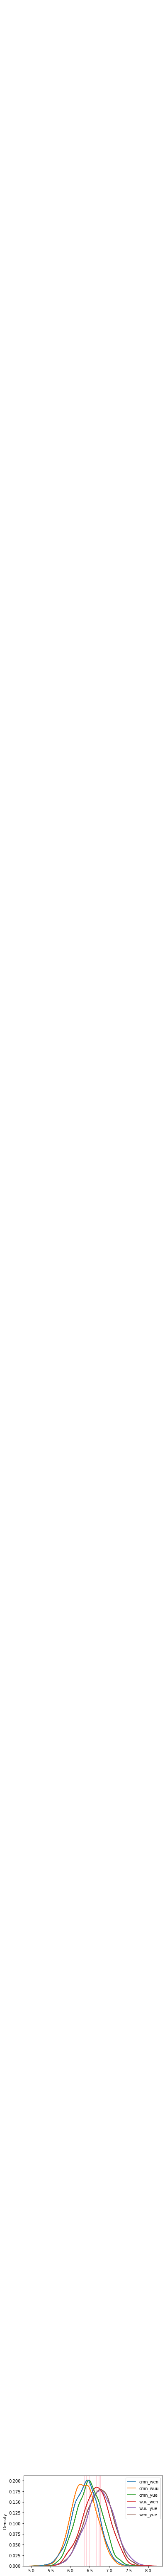

In [38]:
plot(steps_df, annotate_mean=True)

#### Save the ngram alignments into files

In [41]:
import pandas as pd
## The order of the language names matters
def to_csv(ngram_dict, langNames=["cmn", "wen"], n="unigram"):
  if ngram_dict:
    ngram_dict = [[item[0][0], item[0][1], item[1]] for item in ngram_dict.items()]
  df = pd.DataFrame(np.array(ngram_dict), columns=langNames+["count"])
  return df.to_csv(langNames[0] + "_" + langNames[1] + "_" + n + ".csv", index=False)

In [42]:
to_csv(cmn_wen_unigram, langNames=["wuu", "wen"])
to_csv(cmn_wen_bigram, langNames=["wuu", "wen"], n="bigram")
to_csv(cmn_wen_trigram, langNames=["wuu", "wen"], n="trigram")